## Riddler Classic
From Michael Branicky, your card has been declined:

Lucky you! You’ve won two gift cards, each loaded with 50 free drinks from your favorite coffee shop, Riddler Caffei-Nation. The cards look identical, and because you’re not one for record-keeping, you randomly pick one of the cards to pay with each time you get a drink. One day, the clerk tells you that he can’t accept the card you presented to him because it doesn’t have any drink credits left on it.

What is the probability that the other card still has free drinks on it? How many free drinks can you expect are still available?

In [34]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = [12,8]

from math import *
import numpy as np
import scipy.stats as stats
from collections import Counter

In [7]:
Counter(np.random.negative_binomial(1, .5, size=1000))

Counter({2: 125,
         0: 508,
         1: 237,
         14: 1,
         5: 18,
         4: 25,
         7: 8,
         6: 5,
         3: 67,
         11: 1,
         8: 2,
         13: 1,
         9: 1,
         10: 1})

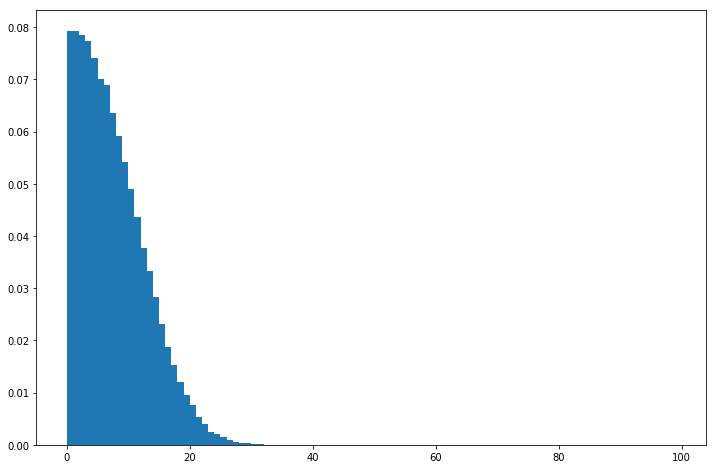

Prob other card has drinks left (empirical): 0.92074
Prob other card has drinks left (theoretical): 0.9204107626128211
Expected number of drinks left (empirical): 7.04382
Wall time: 1.96 s


In [49]:
%%time
N = 50
n_runs = 100000

left = []
for i in range(n_runs):
    x = np.random.randint(2, size=4*N)
    drinks = min(np.where(np.cumsum(x) == N+1)[0][0], np.where(np.cumsum(1-x) == N+1)[0][0])
    left.append(2*N-drinks)

plt.hist(left, bins=np.arange(2*N), density=True)
plt.show()

print(f'Prob other card has drinks left (empirical): {np.mean(np.array(left) > 0)}')
print(f'Prob other card has drinks left (theoretical): {1-stats.binom.pmf(k=50, n=100, p=0.5)}')
print(f'Expected number of drinks left (empirical): {np.mean(left)}')

In [57]:
%%time
N = 50
n_runs = 1000000

left = []
%time samples = np.random.randint(2, size=4*N*n_runs)
for i in range(n_runs):
    x = samples[4*N*i:4*N*(i+1)]
    drinks = min(np.where(np.cumsum(x) == N+1)[0][0], np.where(np.cumsum(1-x) == N+1)[0][0])
    left.append(2*N-drinks)

Wall time: 983 ms
Wall time: 11.3 s


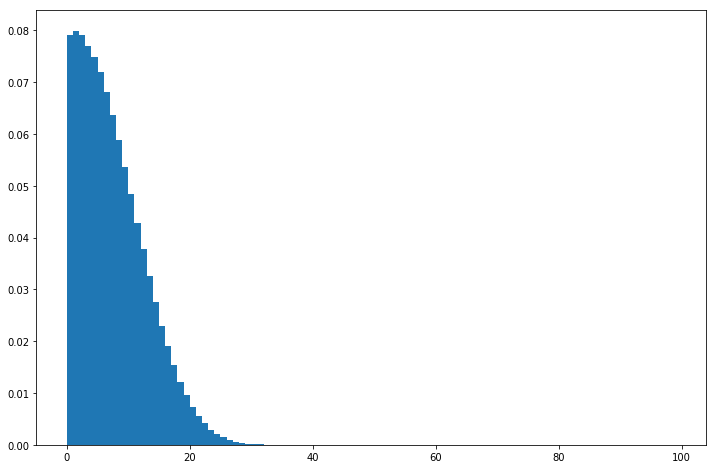

Prob other card has drinks left (empirical): 0.920974
Prob other card has drinks left (theoretical): 0.9204107626128211
Expected number of drinks left (empirical): 7.038763


In [58]:
plt.hist(left, bins=np.arange(2*N), density=True)
plt.show()

print(f'Prob other card has drinks left (empirical): {np.mean(np.array(left) > 0)}')
print(f'Prob other card has drinks left (theoretical): {1-stats.binom.pmf(k=50, n=100, p=0.5)}')
print(f'Expected number of drinks left (empirical): {np.mean(left)}')